In [ ]:
# @title
#saving

import os
import pandas as pd # Make sure pandas is imported

# Define the path for your new checkpoint file
processed_data_path = "/content/drive/MyDrive/citi_bike_project/processed_data/"
checkpoint_file = os.path.join(processed_data_path, "citibike_cleaned_checkpoint2.parquet")

# --- THE FIX IS HERE: Create the directory if it doesn't exist ---
os.makedirs(processed_data_path, exist_ok=True)

print(f"Saving your cleaned data to a new checkpoint file at: {checkpoint_file}")

# Save the current DataFrame 'df' to the new Parquet file
df.to_parquet(checkpoint_file)

print("\n✅ Checkpoint saved successfully! You can now terminate your session.")

Saving your cleaned data to a new checkpoint file at: /content/drive/MyDrive/citi_bike_project/processed_data/citibike_cleaned_checkpoint2.parquet

✅ Checkpoint saved successfully! You can now terminate your session.


In [ ]:
# @title
#loading data from checkpoint
import pandas as pd
import os
from google.colab import drive

# --- 1. Mount your Google Drive ---
print("Connecting to Google Drive...")
drive.mount('/content/drive', force_remount=True)
print("✅ Drive connected!")

# --- 2. Define the path to your cleaned checkpoint file ---
processed_data_path = "/content/drive/MyDrive/citi_bike_project/processed_data/"
checkpoint_file = os.path.join(processed_data_path, "citibike_cleaned_checkpoint2.parquet")

# --- 3. Load the data ---
if os.path.exists(checkpoint_file):
    print("\nLoading final cleaned data from checkpoint...")
    df = pd.read_parquet(checkpoint_file)
    print("✅ Checkpoint loaded successfully. Your DataFrame is clean and ready for analysis.")
    df.info()
else:
    print(f"\n❌ ERROR: The checkpoint file was not found at the path: {checkpoint_file}")
    print("You must first run the script that creates the 'citibike_cleaned_checkpoint.parquet' file.")

Connecting to Google Drive...
Mounted at /content/drive
✅ Drive connected!

Loading final cleaned data from checkpoint...
✅ Checkpoint loaded successfully. Your DataFrame is clean and ready for analysis.
<class 'pandas.core.frame.DataFrame'>
Index: 185317713 entries, 0 to 186184519
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   rideable_type          category      
 1   started_at             datetime64[ns]
 2   ended_at               datetime64[ns]
 3   start_station_name     category      
 4   end_station_name       category      
 5   start_lat              float64       
 6   start_lng              float64       
 7   end_lat                float64       
 8   end_lng                float64       
 9   member_casual          category      
 10  hour                   int32         
 11  day_of_week            category      
 12  month                  int32         
 13  trip_duration_minutes  float64    

In [ ]:
import pandas as pd
import os
from google.colab import drive

# 1. Mounting Google Drive
print("Connecting to Google Drive...")
drive.mount('/content/drive', force_remount=True)
print("Drive connected!")

#path to cleaned master file
processed_data_path = "/content/drive/MyDrive/citi_bike_project/processed_data/"
cleaned_file = os.path.join(processed_data_path, "citibike_cleaned.parquet")



df = pd.read_parquet(cleaned_file)

print("Full dataset loaded successfully!")
df.info()

Connecting to Google Drive...
Mounted at /content/drive
Drive connected!
Full dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186184520 entries, 0 to 186184519
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ride_id                object        
 1   rideable_type          object        
 2   started_at             datetime64[ns]
 3   ended_at               datetime64[ns]
 4   start_station_name     object        
 5   start_station_id       object        
 6   end_station_name       object        
 7   end_station_id         object        
 8   start_lat              float64       
 9   start_lng              float64       
 10  end_lat                float64       
 11  end_lng                float64       
 12  member_casual          object        
 13  hour                   int32         
 14  day_of_week            object        
 15  month                  int32         
 1

In [ ]:
df.drop(columns=['ride_id','start_station_id','end_station_id'],inplace=True)

In [ ]:
shape = df.shape
print(f"Total Rows:    {shape[0]:,}")
print(f"Total Columns: {shape[1]}")

Total Rows:    186,184,520
Total Columns: 14


# Statistical Analysis

In [ ]:
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,hour,month,trip_duration_minutes
count,186184520,186184520,1.861240e+08,1.861240e+08,1.857269e+08,1.857269e+08,1.861845e+08,1.861845e+08,1.861845e+08
mean,2023-04-26 01:44:16.430809600,2023-04-26 02:04:05.752144384,4.073916e+01,-7.397360e+01,4.073892e+01,-7.397364e+01,1.409238e+01,6.746242e+00,1.982202e+01
min,2019-01-19 18:24:31.851000,2020-01-01 00:00:17.705000,3.401486e+01,-1.184815e+02,0.000000e+00,-1.184815e+02,0.000000e+00,1.000000e+00,-5.798077e+01
25%,2021-12-28 16:14:47.068000,2021-12-28 16:38:16.953999872,4.071485e+01,-7.399280e+01,4.071474e+01,-7.399301e+01,1.000000e+01,5.000000e+00,5.619900e+00
50%,2023-07-12 18:52:51.828000,2023-07-12 19:06:43.217999872,4.073810e+01,-7.398047e+01,4.073795e+01,-7.398054e+01,1.500000e+01,7.000000e+00,9.857050e+00
75%,2024-08-31 00:48:28.077500160,2024-08-31 01:06:08.149750016,4.076227e+01,-7.395748e+01,4.076201e+01,-7.395748e+01,1.800000e+01,9.000000e+00,1.748422e+01
max,2025-08-31 23:58:17.885000,2025-08-31 23:59:59.697000,4.550597e+01,-7.356895e+01,4.550597e+01,0.000000e+00,2.300000e+01,1.200000e+01,1.041872e+06
std,NaN,NaN,3.949877e-02,3.009345e-02,5.826735e-02,8.352451e-02,5.011655e+00,2.967630e+00,1.033822e+03


# CHANGING DATA TYPES


In [ ]:
print('dataset info')
df.info()

dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186184520 entries, 0 to 186184519
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   rideable_type          object        
 1   started_at             datetime64[ns]
 2   ended_at               datetime64[ns]
 3   start_station_name     object        
 4   end_station_name       object        
 5   start_lat              float64       
 6   start_lng              float64       
 7   end_lat                float64       
 8   end_lng                float64       
 9   member_casual          object        
 10  hour                   int32         
 11  day_of_week            object        
 12  month                  int32         
 13  trip_duration_minutes  float64       
dtypes: datetime64[ns](2), float64(5), int32(2), object(5)
memory usage: 18.0+ GB


In [ ]:
cols_to_change_dtype = ['start_station_name','rideable_type',
                        'member_casual','hour','day_of_week','end_station_name']


for i in cols_to_change_dtype:
  df[i] = df[i].astype('category')

In [ ]:
print('dataset after changing datatypes')
df.info()

dataset after changing datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186184520 entries, 0 to 186184519
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   rideable_type          category      
 1   started_at             datetime64[ns]
 2   ended_at               datetime64[ns]
 3   start_station_name     category      
 4   end_station_name       category      
 5   start_lat              float64       
 6   start_lng              float64       
 7   end_lat                float64       
 8   end_lng                float64       
 9   member_casual          category      
 10  hour                   category      
 11  day_of_week            category      
 12  month                  int32         
 13  trip_duration_minutes  float64       
dtypes: category(6), datetime64[ns](2), float64(5), int32(1)
memory usage: 11.8 GB


# HANDLING NaN & MISSING VALUES

In [ ]:
print("---Missing Value Counts ---")
print(df.isna().sum())

---Missing Value Counts ---
rideable_type                 0
started_at                    0
ended_at                      0
start_station_name        61162
end_station_name         513389
start_lat                 60515
start_lng                 60515
end_lat                  457630
end_lng                  457630
member_casual                 0
hour                          0
day_of_week                   0
month                         0
trip_duration_minutes         0
dtype: int64


In [ ]:

print(f'no of rows before deleting null values {len(df)}')

df.dropna(subset=['start_station_name','end_station_name','start_lat','start_lng',
                  'end_lat','end_lng'], inplace=True)

print(' ')
print(f'no of rows after deleting null values {len(df)}')


no of rows before deleting null values 186184520
 
no of rows after deleting null values 185628395


In [ ]:
print('after clearing null values')
df.isna().sum()

after clearing null values


,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
end_station_name,0
start_lat,0
start_lng,0
end_lat,0
end_lng,0
member_casual,0


# Checking Duplicates

In [ ]:
duplicates = df.duplicated()
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [rideable_type, started_at, ended_at, start_station_name, end_station_name, start_lat, start_lng, end_lat, end_lng, member_casual, hour, day_of_week, month, trip_duration_minutes]
Index: []


# HANDLING OUTLIERS

In [ ]:
df['trip_duration_minutes'].describe()

,trip_duration_minutes
count,1.856284e+08
mean,1.816991e+01
std,9.597131e+02
min,-5.798077e+01
25%,5.611783e+00
50%,9.834233e+00
75%,1.741233e+01
max,1.041872e+06


In [ ]:
print('Handling outliers in "TRIP DURATION MINUTES"....')
print(f'original number of rows {len(df):,}')

df= df[(df['trip_duration_minutes']>1) & (df['trip_duration_minutes']<=180)]
print(f'number of rows after handling outliers {len(df):,}')


Handling outliers in "TRIP DURATION MINUTES"....
original number of rows 185,628,395
number of rows after handling outliers 185,317,713


In [ ]:
df['trip_duration_minutes'].describe()

,trip_duration_minutes
count,1.853177e+08
mean,1.374975e+01
std,1.333466e+01
min,1.000083e+00
25%,5.605783e+00
50%,9.817033e+00
75%,1.735460e+01
max,1.800000e+02


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
sns.set_style("whitegrid")

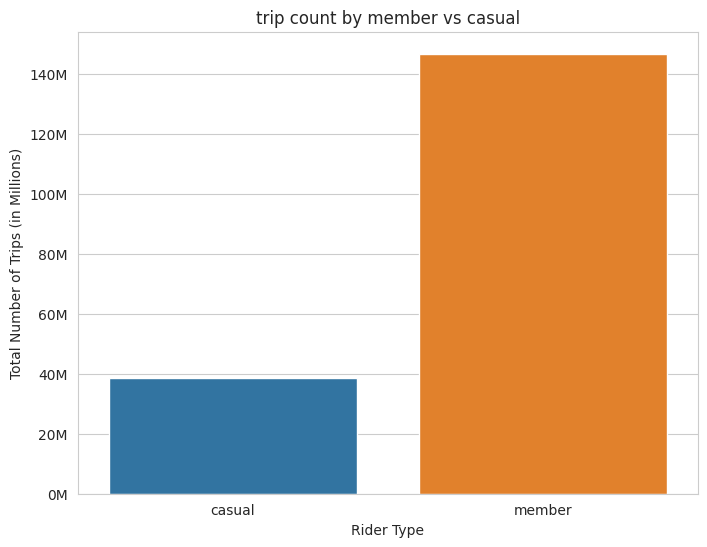

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='member_casual',data=df,hue='member_casual',legend=False)
plt.title('trip count by member vs casual')
plt.xlabel('Rider Type')
plt.ylabel('Total Number of Trips (in Millions)')

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

ax.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.show()

In [ ]:
avg_duration_by_type = df.groupby('member_casual')['trip_duration_minutes'].mean()
print("Average Trip Duration by Rider Type (in minutes)")
print(avg_duration_by_type)

/tmp/ipython-input-2414723714.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration_by_type = df.groupby('member_casual')['trip_duration_minutes'].mean()


Average Trip Duration by Rider Type (in minutes)
member_casual
casual    19.956124
member    12.119992
Name: trip_duration_minutes, dtype: float64


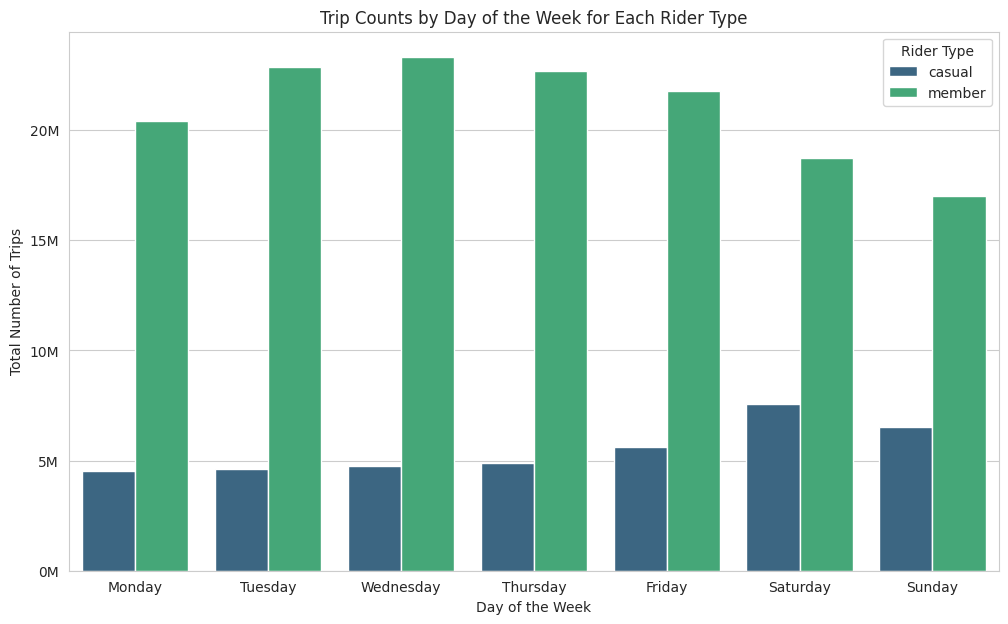

In [ ]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='day_of_week', hue='member_casual', data=df,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              palette='viridis')
plt.title('Trip Counts by Day of the Week for Each Rider Type')
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of Trips')
plt.legend(title='Rider Type')

ax.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.show()

# Dashboard